In [394]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.metrics import mean_squared_error as mse
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression

In [313]:
df_car = pd.read_csv('CAR DETAILS.csv')

In [314]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [315]:
df_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [316]:
#df_car[df['selling_price']==8900000]

In [317]:
df_car['name'].value_counts()

Maruti Swift Dzire VDI           69
Maruti Alto 800 LXI              59
Maruti Alto LXi                  47
Hyundai EON Era Plus             35
Maruti Alto LX                   35
                                 ..
Datsun RediGO SV 1.0              1
Honda Amaze VX AT i-Vtech         1
Ford Endeavour XLT TDCi 4X2       1
Mahindra Jeep MM 775 XDB          1
Mahindra XUV500 W6 1.99 mHawk     1
Name: name, Length: 1491, dtype: int64

In [318]:
df = df_car.copy()

In [319]:
df['Age'] =2021 - df['year']

In [320]:
df.drop('year', inplace=True, axis =1)

In [321]:
df[df['km_driven']==806599]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
1243,Maruti Swift VXI BSIII,250000,806599,Petrol,Dealer,Manual,First Owner,12


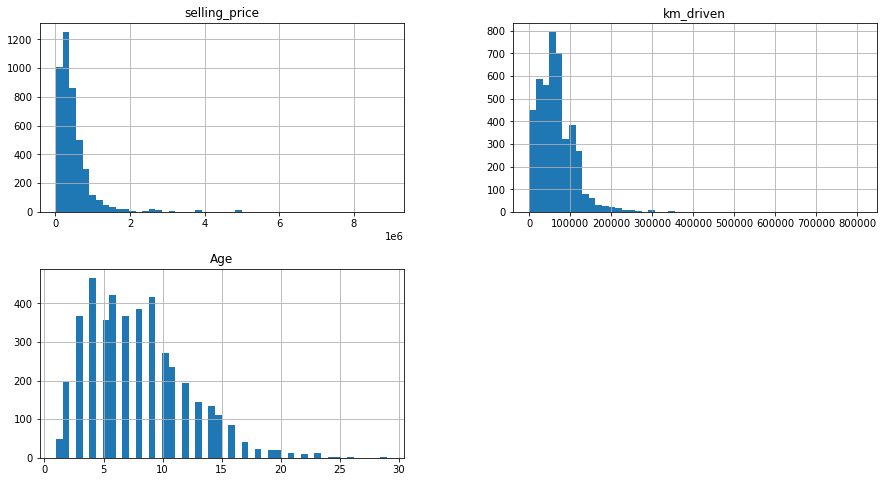

In [322]:
df.hist(bins=50, figsize=(15,8))
plt.show()

In [323]:
df['log selling_price'] =np.log(df['selling_price'])

C:\IDE\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log selling_price', ylabel='Density'>

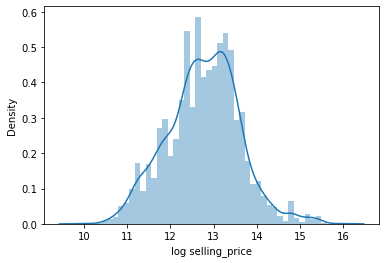

In [324]:
sns.distplot(df['log selling_price'], kde=True)

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               4340 non-null   object 
 1   selling_price      4340 non-null   int64  
 2   km_driven          4340 non-null   int64  
 3   fuel               4340 non-null   object 
 4   seller_type        4340 non-null   object 
 5   transmission       4340 non-null   object 
 6   owner              4340 non-null   object 
 7   Age                4340 non-null   int64  
 8   log selling_price  4340 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 305.3+ KB


In [326]:
df.iloc[:,:-1].describe()

,selling_price,km_driven,Age
count,4.340000e+03,4340.000000,4340.000000
mean,5.041273e+05,66215.777419,7.909217
std,5.785487e+05,46644.102194,4.215344
min,2.000000e+04,1.000000,1.000000
25%,2.087498e+05,35000.000000,5.000000
50%,3.500000e+05,60000.000000,7.000000
75%,6.000000e+05,90000.000000,10.000000
max,8.900000e+06,806599.000000,29.000000


In [327]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [328]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [329]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [330]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [331]:
#df=df[df['fuel']!= 'Electric']

In [332]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age,log selling_price
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14,11.002100
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14,11.813030
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9,13.304685
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4,12.429216
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7,13.017003


In [333]:
df['Brand'] =df.name.str.split().str.get(0) 
df_car['Brand'] =df.name.str.split().str.get(0) 
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age,log selling_price,Brand
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14,11.002100,Maruti
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14,11.813030,Maruti
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9,13.304685,Hyundai
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4,12.429216,Datsun
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7,13.017003,Honda


In [334]:
round(df_car.groupby('Brand')['selling_price'].mean(),2).head()

Brand
Ambassador     180000.00
Audi          1931633.33
BMW           2945384.62
Chevrolet      236727.06
Daewoo          60000.00
Name: selling_price, dtype: float64

In [335]:
df['Brand'].value_counts()
Brands =round(df_car.groupby(['Brand'])['selling_price'].mean(),2)
Brands
df['Group_Mean']=df['Brand'].map(Brands)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age,log selling_price,Brand,Group_Mean
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14,11.002100,Maruti,342416.30
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14,11.813030,Maruti,342416.30
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9,13.304685,Hyundai,419940.26
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4,12.429216,Datsun,297026.95
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7,13.017003,Honda,538146.78


In [336]:
df['Brand_Group'] = np.where(
    df['Group_Mean'] >= 1000000, "Premium", np.where(
     df['Group_Mean'] <400000, "Low", "Medium"))

In [337]:
cols = ['Brand','Brand_Group','km_driven','Age', 'fuel','seller_type','transmission', 'owner', 'selling_price',"log selling_price"]

In [338]:
df= df[cols]
df.head()

,Brand,Brand_Group,km_driven,Age,fuel,seller_type,transmission,owner,selling_price,log selling_price
0,Maruti,Low,70000,14,Petrol,Individual,Manual,First Owner,60000,11.002100
1,Maruti,Low,50000,14,Petrol,Individual,Manual,First Owner,135000,11.813030
2,Hyundai,Medium,100000,9,Diesel,Individual,Manual,First Owner,600000,13.304685
3,Datsun,Low,46000,4,Petrol,Individual,Manual,First Owner,250000,12.429216
4,Honda,Medium,141000,7,Diesel,Individual,Manual,Second Owner,450000,13.017003


In [339]:
df['Brand'][df['Brand_Group']=='Low'].value_counts()

Maruti        1280
Tata           361
Chevrolet      188
Fiat            37
Datsun          37
Ambassador       4
OpelCorsa        2
Force            1
Daewoo           1
Name: Brand, dtype: int64

In [340]:
df['Brand'][df['Brand_Group']=='Medium'].value_counts()

Hyundai       821
Mahindra      365
Honda         252
Ford          238
Toyota        206
Renault       146
Volkswagen    107
Skoda          68
Nissan         64
Mitsubishi      6
Name: Brand, dtype: int64

In [341]:
df['Brand'][df['Brand_Group']=='Premium'].value_counts()

Audi             60
BMW              39
Mercedes-Benz    35
Jaguar            6
Land              5
Volvo             4
Jeep              3
MG                2
Isuzu             1
Kia               1
Name: Brand, dtype: int64

In [342]:
df.drop('Brand', axis=1, inplace=True)

In [343]:
df['Brand_Group'].value_counts()

Medium     2273
Low        1911
Premium     156
Name: Brand_Group, dtype: int64

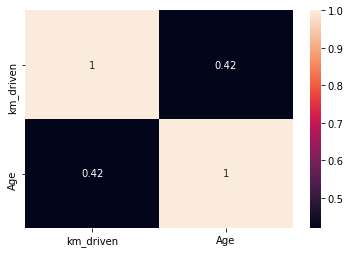

In [344]:

sns.heatmap(df.iloc[:,:-2].corr(), annot= True);

In [345]:
  df.head()

,Brand_Group,km_driven,Age,fuel,seller_type,transmission,owner,selling_price,log selling_price
0,Low,70000,14,Petrol,Individual,Manual,First Owner,60000,11.002100
1,Low,50000,14,Petrol,Individual,Manual,First Owner,135000,11.813030
2,Medium,100000,9,Diesel,Individual,Manual,First Owner,600000,13.304685
3,Low,46000,4,Petrol,Individual,Manual,First Owner,250000,12.429216
4,Medium,141000,7,Diesel,Individual,Manual,Second Owner,450000,13.017003


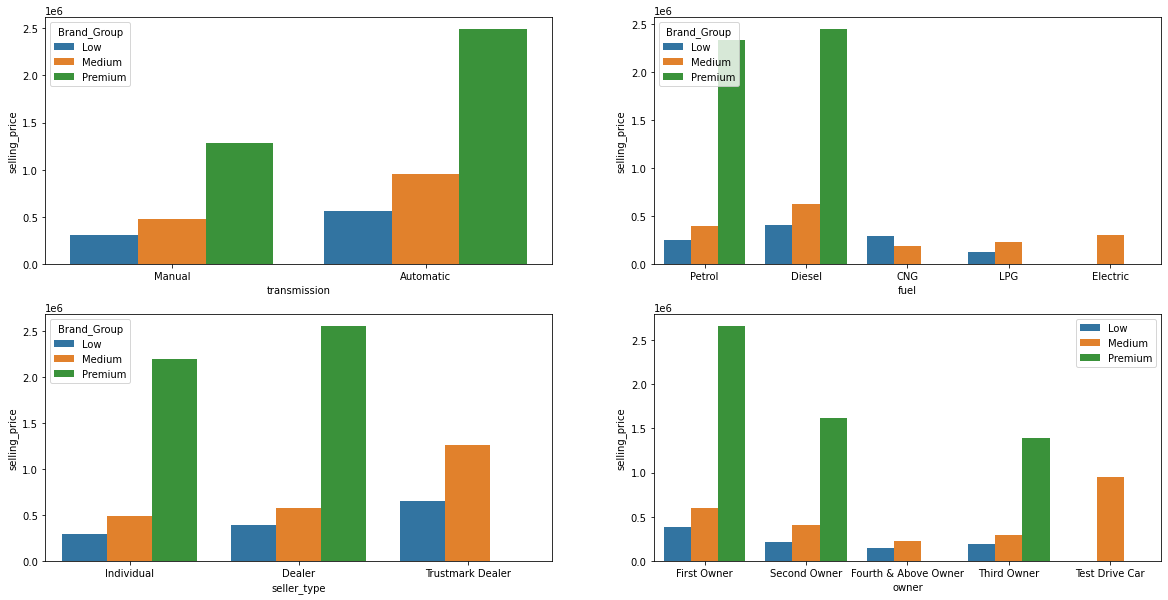

In [346]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.barplot(ax=axes[0, 0],x = 'transmission',y ='selling_price', data =df, hue="Brand_Group", ci=None)
sns.barplot(ax=axes[0, 1],x = 'fuel', y ='selling_price', data =df, hue="Brand_Group",ci=None)
sns.barplot(ax=axes[1, 0],x = 'seller_type',y ='selling_price', data =df, hue="Brand_Group",ci=None)
sns.barplot(ax=axes[1, 1],x = 'owner', y ='selling_price', data =df, hue="Brand_Group", ci=None)
plt.legend(loc='upper right')

In [347]:
'''

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.barplot(ax=axes[0, 0],x = 'Brand_Group',y ='selling_price', data =df,ci=None)
sns.barplot(ax=axes[0, 1],x = 'kmLevel', y ='selling_price', data =df5, hue="Brand_Group", ci=None,order=['Level1', 'Level2', 'Level3', 'Level4'])
#plt.legend(loc='upper right')
plt.show()
'''

'\n\nfig, axes = plt.subplots(2, 2, figsize=(20, 10))\nsns.barplot(ax=axes[0, 0],x = \'Brand_Group\',y =\'selling_price\', data =df,ci=None)\nsns.barplot(ax=axes[0, 1],x = \'kmLevel\', y =\'selling_price\', data =df5, hue="Brand_Group", ci=None,order=[\'Level1\', \'Level2\', \'Level3\', \'Level4\'])\n#plt.legend(loc=\'upper right\')\nplt.show()\n'

<AxesSubplot:xlabel='owner', ylabel='count'>

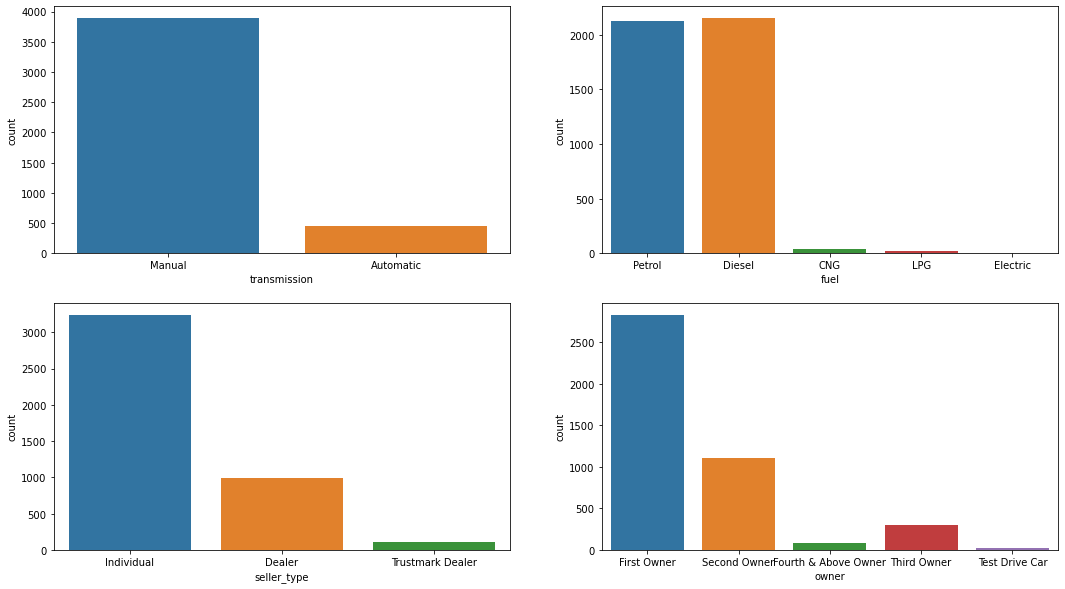

In [348]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.countplot(ax=axes[0, 0],x = 'transmission', data =df)
sns.countplot(ax=axes[0, 1],x = 'fuel', data =df)
sns.countplot(ax=axes[1, 0],x = 'seller_type', data =df)
sns.countplot(ax=axes[1, 1],x = 'owner', data =df)


In [349]:
'''

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(ax=axes[0, 0],x = 'Brand_Group',  data =df)
sns.countplot(ax=axes[0, 1],x = 'kmLevel', data =df5,order=['Level1', 'Level2', 'Level3', 'Level4'])
'''

"\n\nfig, axes = plt.subplots(2, 2, figsize=(20, 10))\nsns.countplot(ax=axes[0, 0],x = 'Brand_Group',  data =df)\nsns.countplot(ax=axes[0, 1],x = 'kmLevel', data =df5,order=['Level1', 'Level2', 'Level3', 'Level4'])\n"

In [350]:
df[['km_driven', 'Age', 'selling_price']][df["Brand_Group"]=="Medium"].describe()

,km_driven,Age,selling_price
count,2273.000000,2273.000000,2.273000e+03
mean,67068.368676,7.475583,5.279656e+05
std,47464.439884,3.923952,3.978289e+05
min,1.000000,1.000000,2.000000e+04
25%,32000.000000,4.000000,2.800000e+05
50%,59319.000000,7.000000,4.500000e+05
75%,90000.000000,10.000000,6.500000e+05
max,400000.000000,25.000000,3.200000e+06


In [351]:
df[['km_driven', 'Age', 'selling_price']][df["Brand_Group"]=="Low"].describe()

,km_driven,Age,selling_price
count,1911.000000,1911.000000,1.911000e+03
mean,66219.340136,8.515437,3.182269e+05
std,46322.103212,4.485538,2.333446e+05
min,1000.000000,1.000000,3.000000e+04
25%,37045.500000,5.000000,1.400000e+05
50%,60000.000000,8.000000,2.500000e+05
75%,90000.000000,11.000000,4.400000e+05
max,806599.000000,29.000000,1.700000e+06


In [352]:
df[['km_driven', 'Age', 'selling_price']][df["Brand_Group"]=="Premium"].describe()

,km_driven,Age,selling_price
count,156.000000,156.000000,1.560000e+02
mean,53749.442308,6.801282,2.434071e+06
std,35692.240149,3.907676,1.481883e+06
min,1500.000000,1.000000,3.500000e+05
25%,30000.000000,3.000000,1.300000e+06
50%,48000.000000,7.000000,1.837500e+06
75%,79625.000000,8.000000,3.575000e+06
max,175900.000000,23.000000,8.900000e+06


# Hypothesis Testing

## Two sample Test - T Test

#### Kilometers Driven Vs Fuel type

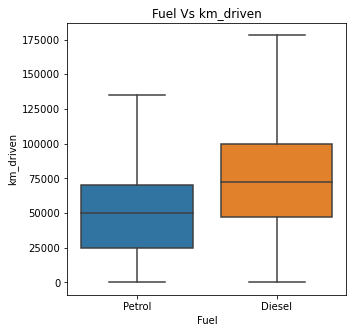

In [353]:
df1= df.copy()
df1 = df1[(df1['fuel']=='Petrol') | (df1['fuel']=='Diesel')] 
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='fuel', y='km_driven', data=df1,showfliers=False)
ax.set(xlabel = 'Fuel', ylabel = 'km_driven', title = 'Fuel Vs km_driven')
plt.show()

In [354]:
km_Petrol = df1['km_driven'][df1['fuel']=='Petrol' ]
km_Diesel = df1['km_driven'][df1['fuel']=='Diesel']
tscore,pval = stats.ttest_ind(km_Petrol, km_Diesel)  
print(pval)
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

1.4043722837909276e-84
Reject null hypothesis


#### Selling price of low value brand with kms driven lesser than average Vs Selling price of Medium value brand with kms driven greater than average


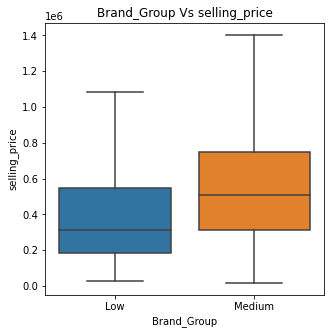

In [355]:
df2=df.copy()
df2 =df2[((df['Brand_Group']=='Low') & (df2['km_driven']<=65000))|((df2['Brand_Group']=='Medium')&(df2['km_driven']<=65000))]
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='Brand_Group', y='selling_price', data=df2,showfliers=False)
ax.set(xlabel = 'Brand_Group', ylabel = 'selling_price', title = 'Brand_Group Vs selling_price')
plt.show()

In [356]:
SP_LowLesserThanAvg = df2['selling_price'][(df2['Brand_Group']=='Low') & (df2['km_driven']<=65000)]
SP_MedGreaterThanAvg= df2['selling_price'][(df['Brand_Group']=='Medium')&(df2['km_driven']<=65000)]
tscore,pval = stats.ttest_ind(SP_LowLesserThanAvg, SP_MedGreaterThanAvg)  
print(pval)
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

8.928761476042556e-43
Reject null hypothesis


#### kms driven Vs Premium and Non Premium cars


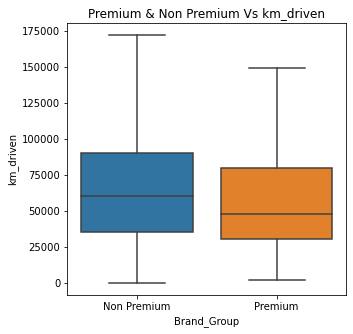

In [357]:
df3=df.copy()
#df3['Brand_Group'][(df['Brand_Group']=='Low')|(df['Brand_Group']=='Medium')]="Non Premium" 
df3['Brand_Group'] =df3['Brand_Group'].apply(lambda x: "Non Premium" if (x=="Low" or x=="Medium") else "Premium")
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='Brand_Group', y='km_driven', data=df3,showfliers=False)
ax.set(xlabel = 'Brand_Group', ylabel = 'km_driven', title = 'Premium & Non Premium Vs km_driven')
plt.show()

In [358]:
km_Premium = df3['Brand_Group'][df3['Brand_Group']=='Premium']
km_NonPremium= df3['Brand_Group'][df3['Brand_Group']=='Non Premium']
tscore,pval = stats.ttest_ind(SP_LowLesserThanAvg, SP_MedGreaterThanAvg)  
print(pval)
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

8.928761476042556e-43
Reject null hypothesis


#### Seller_type Vs selling_price for Premium cars

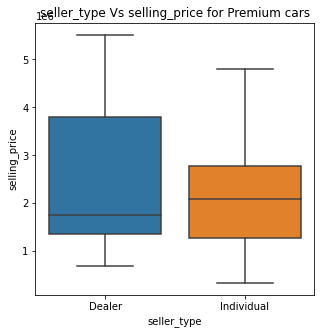

In [359]:
df4= df3.copy()
#df3['Brand_Group'][(df['Brand_Group']=='Low')|(df['Brand_Group']=='Medium')]="Non Premium" 
df4 =df4[df4['Brand_Group']=="Premium"]
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='seller_type', y='selling_price', data=df4,showfliers=False)
ax.set(xlabel = 'seller_type', ylabel = 'selling_price', title = 'seller_type Vs selling_price for Premium cars')
plt.show()

In [360]:
Sp_Dealer = df3['selling_price'][df3['seller_type']=='Dealer']
Sp_Individual= df3['selling_price'][df3['seller_type']=='Individual']
tscore,pval = stats.ttest_ind(Sp_Dealer, Sp_Individual)  
print(pval)
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

1.7659856973660056e-47
Reject null hypothesis


## ANOVA

#### seller_type Vs selling_price for Non Premium cars

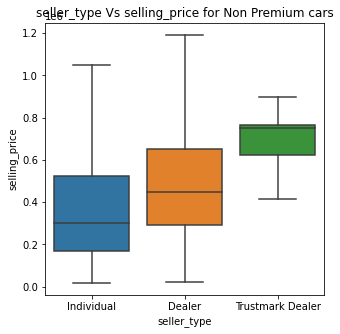

In [361]:
df4= df3.copy()
#df3['Brand_Group'][(df['Brand_Group']=='Low')|(df['Brand_Group']=='Medium')]="Non Premium" 
df4 =df4[df4['Brand_Group']=="Non Premium"]
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='seller_type', y='selling_price', data=df4,showfliers=False)
ax.set(xlabel = 'seller_type', ylabel = 'selling_price', title = 'seller_type Vs selling_price for Non Premium cars')
plt.show()

In [362]:
Sp_Dealer = df3['selling_price'][df3['seller_type']=='Dealer']
Sp_Individual= df3['selling_price'][df3['seller_type']=='Individual']
Sp_TrustMarkDealer = df3['selling_price'][df3['seller_type']=="Trustmark Dealer"]
Fscore, pvalue = stats.f_oneway(Sp_Dealer, Sp_Individual, Sp_TrustMarkDealer)

print(pvalue)
if pvalue<0.05:
    print("Reject null hypothesis")
else:
    print("Rccept null hypothesis")

1.907388411602548e-57
Reject null hypothesis


#### Selling_price  Vs Kms_driven

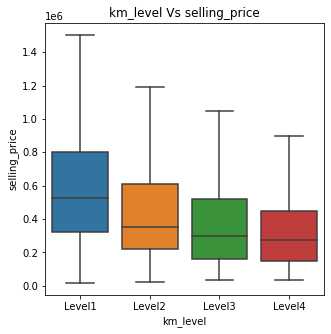

In [363]:

df5= df.copy()
df5['kmLevel'] = np.where(
    df5['km_driven'] <= 35000, "Level1", np.where(
     (df5['km_driven'] >35000) & (df5['km_driven'] <=60000), "Level2",np.where(
     (df5['km_driven'] >60000) & (df5['km_driven'] <=90000), "Level3", "Level4")))
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='kmLevel', y='selling_price', data=df5,showfliers=False,order=['Level1', 'Level2', 'Level3', 'Level4'])
ax.set(xlabel = 'km_level', ylabel = 'selling_price', title = 'km_level Vs selling_price')
plt.show()

In [364]:
Sp_kmLevel1 = df5['selling_price'][df5['km_driven']<=35000] 
Sp_kmLevel2 = df5['selling_price'][(df5['km_driven']<=60000) & (df5['km_driven']>35000)]
Sp_kmLevel3 = df5['selling_price'][(df5['km_driven']<=90000) & (df5['km_driven']>60000)]                        
Sp_kmLevel4 = df5['selling_price'][df5['km_driven']>90000]
Fscore, pvalue = stats.f_oneway(Sp_kmLevel1,Sp_kmLevel2,Sp_kmLevel3,Sp_kmLevel4)

print(pvalue)
if pvalue<0.05:
    print("Reject null hypothesis")
else:
    print("Rccept null hypothesis")

3.569477771843596e-59
Reject null hypothesis


#### Owner Vs Selling Price

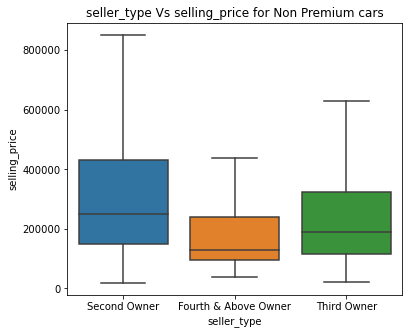

In [365]:
df6= df.copy()
plt.figure(figsize=(6, 5))
df6 =df6[(df6['owner']=="Second Owner") |  (df6['owner']=="Third Owner") | (df6['owner']=="Fourth & Above Owner") ]
ax = sns.boxplot(x='owner', y='selling_price', data=df6,showfliers=False)
ax.set(xlabel = 'seller_type', ylabel = 'selling_price', title = 'seller_type Vs selling_price for Non Premium cars')
plt.show()

In [366]:
Sp_owner1 = df6['selling_price'][df6['owner'] =="Second Owner"] 
Sp_owner2 = df6['selling_price'][df6['owner'] =="Third Owner"]
Sp_owner3 = df6['selling_price'][df6['owner'] =="Fourth & Above Owner"]                        

Fscore, pvalue = stats.f_oneway(Sp_owner1,Sp_owner2,Sp_owner3)

print(pvalue)
if pvalue<0.05:
    print("Reject null hypothesis")
else:
    print("Rccept null hypothesis")

3.6804480136077177e-07
Reject null hypothesis


## Chi Square Test

#### To check whether the owners of premium and non premium brands choose the seller type similarly or differently

In [367]:
contingency_table=pd.crosstab(df['Brand_Group'],df['seller_type'])
data = contingency_table.values


In [368]:

stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('__')
else:
    print('Independent (H0 holds true)')

p value is 1.3908545327295305e-54
__


# Mutiple Linear Regression

In [369]:
df.head()
df= df.drop('selling_price', axis=1)

In [370]:
df_dummy =pd.get_dummies( df.iloc[:,:-1], drop_first=True)


In [371]:
X = df_dummy
y = df.iloc[:,-1]

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [373]:
train_x_with_constant=sm.add_constant((X_train))
model = sm.OLS(y_train,train_x_with_constant ).fit()        #
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      log selling_price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     640.2
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:29:10   Log-Likelihood:                -1594.2
No. Observations:                3038   AIC:                             3220.
Df Residuals:                    3022   BIC:                             3317.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Text(0, 0.5, 'Residuals')

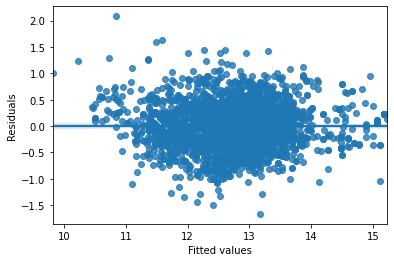

In [376]:
plt.figure()
ax =sns.regplot(y = model.resid, x = model.fittedvalues);   # residual plot
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

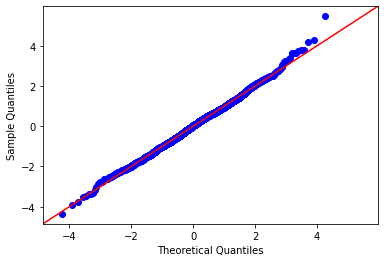

In [377]:

fig = sm.qqplot( model.resid.values, stats.t,fit=True, line="45")
plt.show()

C:\IDE\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

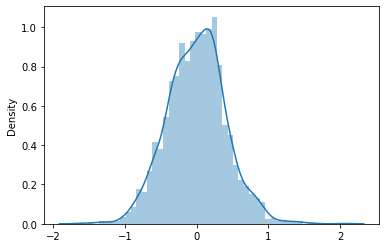

In [378]:
#plt.hist(model.resid.values, bins = 50);
sns.distplot(model.resid.values, kde=True)

In [379]:
durbin_watson(model.resid)

1.9976457583979073

In [380]:
test_x_with_constant=sm.add_constant((X_test)) 
pred_y = model.predict(test_x_with_constant)


In [381]:
MeanSquareError = mse(y_test, pred_y)
print('MSE =', MeanSquareError,'and RMSE =', np.sqrt(MeanSquareError))

MSE = 0.18246720941078423 and RMSE = 0.4271618070600229


In [393]:
np.sqrt(MeanSquareError)/np.mean(y_test)*100

3.3527126912537084

In [396]:
from sklearn.model_selection import cross_val_score
regr = LinearRegression()
  
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [403]:
feature_array = [500000,4,0,0,1,0,0,0,1,0,1,0,0,0,0]
prediction = regr.predict([feature_array])
print(prediction)

[13.0146899]


In [404]:
y_pred

array([12.36089908, 13.28832335, 12.01688405, ..., 12.43583677,
       13.17156128, 11.70566341])

# Logistic Regression

In [382]:
df_LR=df3.drop(['selling_price' ], axis=1)
df_LR

,Brand_Group,km_driven,Age,fuel,seller_type,transmission,owner,log selling_price
0,Non Premium,70000,14,Petrol,Individual,Manual,First Owner,11.002100
1,Non Premium,50000,14,Petrol,Individual,Manual,First Owner,11.813030
2,Non Premium,100000,9,Diesel,Individual,Manual,First Owner,13.304685
3,Non Premium,46000,4,Petrol,Individual,Manual,First Owner,12.429216
4,Non Premium,141000,7,Diesel,Individual,Manual,Second Owner,13.017003
...,...,...,...,...,...,...,...,...
4335,Non Premium,80000,7,Diesel,Individual,Manual,Second Owner,12.923910
4336,Non Premium,80000,7,Diesel,Individual,Manual,Second Owner,12.923910
4337,Non Premium,83000,12,Petrol,Individual,Manual,Second Owner,11.608236
4338,Non Premium,90000,5,Diesel,Individual,Manual,First Owner,13.670485


In [383]:
df_dummy =pd.get_dummies( df_LR, drop_first=True)
df_dummy
#Y = df4[]

,km_driven,Age,log selling_price,Brand_Group_Premium,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,14,11.002100,0,0,0,0,1,1,0,1,0,0,0,0
1,50000,14,11.813030,0,0,0,0,1,1,0,1,0,0,0,0
2,100000,9,13.304685,0,1,0,0,0,1,0,1,0,0,0,0
3,46000,4,12.429216,0,0,0,0,1,1,0,1,0,0,0,0
4,141000,7,13.017003,0,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,80000,7,12.923910,0,1,0,0,0,1,0,1,0,1,0,0
4336,80000,7,12.923910,0,1,0,0,0,1,0,1,0,1,0,0
4337,83000,12,11.608236,0,0,0,0,1,1,0,1,0,1,0,0
4338,90000,5,13.670485,0,1,0,0,0,1,0,1,0,0,0,0


In [384]:
X = df_dummy.drop('Brand_Group_Premium', axis=1)
y =df_dummy[['Brand_Group_Premium']]
y.value_counts()

Brand_Group_Premium
0                      4184
1                       156
dtype: int64

In [385]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.3, random_state=42)

In [386]:
X_train_lr
y_train_lr.value_counts()

Brand_Group_Premium
0                      2929
1                       109
dtype: int64

In [387]:
#log_reg = sm.Logit(y_test_lr,X_test_lr).fit()

In [388]:
#print(log_reg.summary())

In [389]:
#log_reg.predict(X_test_lr)